## Customer Segmentation using Machine Learning

### Introduction
During the course of this project we will learn about how we can perform segmentation operations on a dataset. Where are these operations performed and what are the different applications of it.

### What is a Customer Segmentation?
In marketing,market segmentation is the process of dividing a broad consumer or business market, normally consisting of existing and potential customers, into sub-groups of consumers based on some type of shared characteristic.

Customer Segmentation is the process by which you divide your customers based on common characteristics- such as demographics or behaviour, so you can market to those customers more effectively.

### Application of Customer Segmentation
* Demographic Segmentation
* Geographic Segmentation
* Technographic Segmentation
* Behavioural Segmentation

### Problem Statement
We have a dataset which contains certain parameters and based on those parameters some clusters are assigned to them. We will see how we can assign these clusters and will try to do analysis on the same.

### Importing libraries

In [211]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Importing dataset

In [212]:
df =pd.read_csv("/content/drive/MyDrive/data/customer segmentation.csv")

In [213]:
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


### Data analysis

#### Checking for datatypes

In [214]:
#info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [215]:
#describe
df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [216]:
df["Segmentation"].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

#### Checking for column names

In [217]:
df.columns

Index(['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession',
       'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1',
       'Segmentation'],
      dtype='object')

#### Checking for null values

In [218]:
df.isnull().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [219]:
df.shape

(8068, 11)

In [220]:
df = df.dropna()

In [221]:
df.isnull().sum()

ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64

#### Data analysis

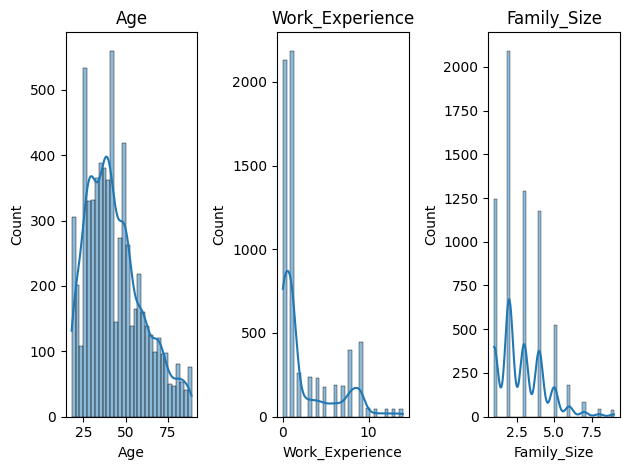

In [222]:
fig,ax = plt.subplots(nrows=1,ncols=3)
lists=["Age","Work_Experience","Family_Size"]
for i,j in enumerate(lists):
  sns.histplot(df[j],ax=ax[i],kde=True)
  ax[i].set_title(j)
plt.tight_layout()

In [223]:
#check for segmentation columns and the mean age,work experience,family size
df.groupby("Segmentation")[["Age","Work_Experience","Family_Size"]].agg("mean")

,Age,Work_Experience,Family_Size
Segmentation,,,
A,44.421411,2.888614,2.431931
B,48.113232,2.393766,2.682570
C,49.327907,2.224419,2.961628
D,32.956744,2.997154,3.241320


<Axes: xlabel='Segmentation'>

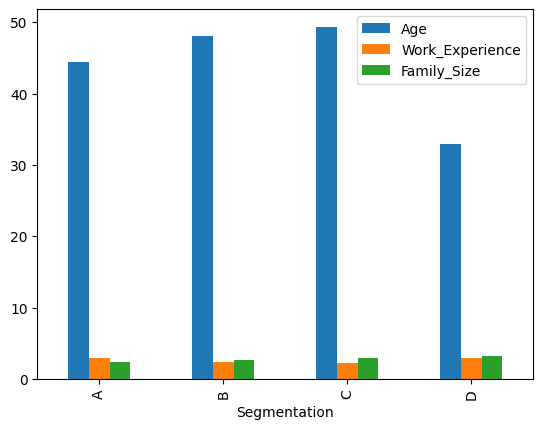

In [224]:
#plot for segmentation columns and the mean age,work experience,family size
df.groupby("Segmentation")[["Age","Work_Experience","Family_Size"]].agg("mean").plot(kind="bar")

In [225]:
df.groupby("Gender")[["Age","Work_Experience","Family_Size"]].mean()

,Age,Work_Experience,Family_Size
Gender,,,
Female,43.146252,2.826640,2.742972
Male,43.852869,2.468589,2.920859


<Axes: ylabel='Gender'>

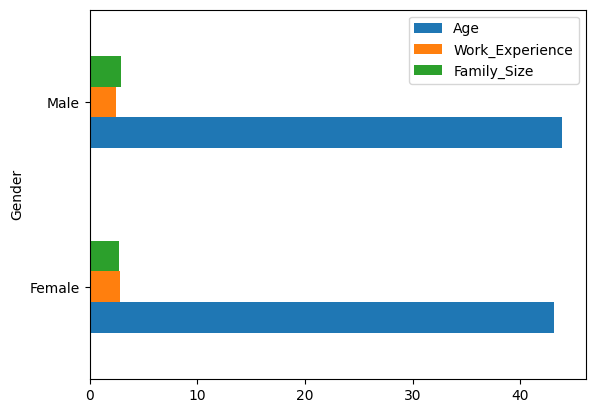

In [226]:
df.groupby("Gender")[["Age","Work_Experience","Family_Size"]].mean().plot(kind="barh")

In [227]:
#check profession by gender
df.groupby(["Profession","Gender"])["Gender"].count()

Profession     Gender
Artist         Female    1055
               Male      1137
Doctor         Female     257
               Male       335
Engineer       Female     466
               Male       116
Entertainment  Female     214
               Male       595
Executive      Female      22
               Male       483
Healthcare     Female     446
               Male       631
Homemaker      Female     144
               Male        31
Lawyer         Female     256
               Male       244
Marketing      Female     128
               Male       105
Name: Gender, dtype: int64

In [228]:
#check spending score by gender
df.groupby(["Gender","Spending_Score"])["Spending_Score"].count()

Gender  Spending_Score
Female  Average            692
        High               393
        Low               1903
Male    Average            970
        High               611
        Low               2096
Name: Spending_Score, dtype: int64

<Axes: ylabel='Gender,Spending_Score'>

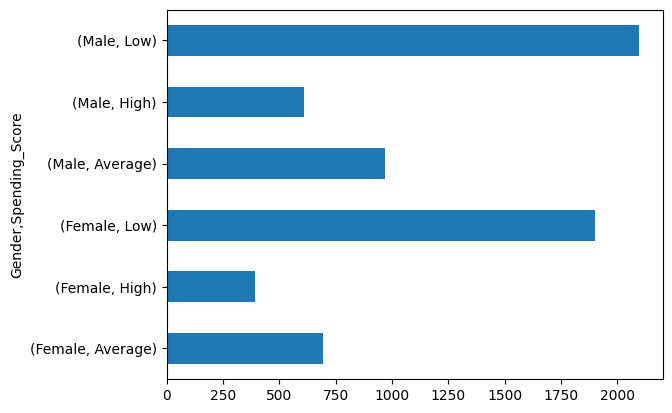

In [229]:
df.groupby(["Gender","Spending_Score"])["Spending_Score"].count().plot(kind="barh")

In [230]:
df.corr()

<ipython-input-230-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,ID,Age,Work_Experience,Family_Size
ID,1.000000,0.011664,-0.028948,0.006343
Age,0.011664,1.000000,-0.188769,-0.281772
Work_Experience,-0.028948,-0.188769,1.000000,-0.069123
Family_Size,0.006343,-0.281772,-0.069123,1.000000


<ipython-input-231-2d3646dd07cf>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot = True)


<Axes: >

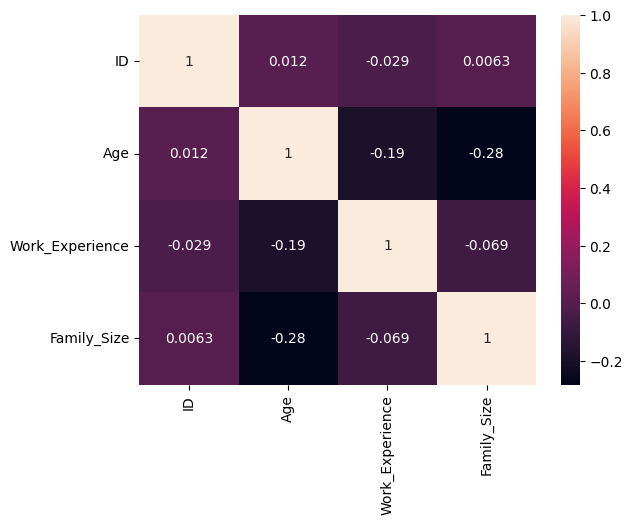

In [231]:
sns.heatmap(df.corr(),annot = True)

In [232]:
df["Segmentation"].value_counts()

D    1757
C    1720
A    1616
B    1572
Name: Segmentation, dtype: int64

In [233]:

def encode(segmentation):
  if segmentation == "A":
    return 0
  if segmentation == "B":
    return 1
  if segmentation == "C":
    return 2
  if segmentation == "D":
    return 3

In [234]:
df["Segmentation"] = df["Segmentation"].apply(encode)

In [235]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,3
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,1
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,1
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,2
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,2
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,1
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,3
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,3
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,1


### Using Supervised Approach

### Data Preprocessing

#### Splitting the data into train and test split

In [236]:
X = df.drop("Segmentation",axis=1)

In [237]:
y = df["Segmentation"]

In [238]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)


In [239]:
X_train = X_train.drop("ID",axis=1)

In [240]:
X_test = X_test.drop("ID",axis=1)

#### Label Encoding the columns

In [241]:
X_train

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1
5190,Male,Yes,47,Yes,Artist,2.0,Low,1.0,Cat_6
2803,Male,No,40,No,Entertainment,1.0,Low,1.0,Cat_4
1024,Male,Yes,26,Yes,Marketing,0.0,Low,2.0,Cat_3
5305,Female,No,32,No,Entertainment,0.0,Low,2.0,Cat_2
1757,Male,Yes,47,No,Executive,0.0,High,2.0,Cat_7
...,...,...,...,...,...,...,...,...,...
4557,Male,Yes,62,No,Executive,0.0,High,2.0,Cat_4
6266,Female,Yes,48,Yes,Homemaker,3.0,Average,2.0,Cat_3
6309,Male,Yes,63,Yes,Artist,0.0,Average,4.0,Cat_6
6505,Male,Yes,57,Yes,Entertainment,0.0,Low,2.0,Cat_6


In [242]:
cols_to_le = ["Gender","Ever_Married","Graduated","Spending_Score","Var_1"]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cols in cols_to_le:
  X_train[cols] = le.fit_transform(X_train[cols])
for cols in cols_to_le:
  X_test[cols] = le.fit_transform(X_test[cols])


#### One Hot Encoding the columns

In [243]:
X_train["Profession"].value_counts()

Artist           1472
Healthcare        739
Entertainment     534
Doctor            387
Engineer          385
Executive         347
Lawyer            336
Marketing         157
Homemaker         108
Name: Profession, dtype: int64

In [244]:
X_train[["Artist","Doctor","Engineer","Entertainment","Executive","Healthcare","Homemaker","Lawyer","Marketing"]] = pd.get_dummies(X_train["Profession"])

In [245]:
X_train = X_train.drop("Profession",axis=1)

In [246]:
X_test[["Artist","Doctor","Engineer","Entertainment","Executive","Healthcare","Homemaker","Lawyer","Marketing"]] = pd.get_dummies(X_test["Profession"])

In [247]:
X_test = X_test.drop("Profession",axis=1)

In [248]:
X_train

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
5190,1,1,47,1,2.0,2,1.0,5,1,0,0,0,0,0,0,0,0
2803,1,0,40,0,1.0,2,1.0,3,0,0,0,1,0,0,0,0,0
1024,1,1,26,1,0.0,2,2.0,2,0,0,0,0,0,0,0,0,1
5305,0,0,32,0,0.0,2,2.0,1,0,0,0,1,0,0,0,0,0
1757,1,1,47,0,0.0,1,2.0,6,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4557,1,1,62,0,0.0,1,2.0,3,0,0,0,0,1,0,0,0,0
6266,0,1,48,1,3.0,0,2.0,2,0,0,0,0,0,0,1,0,0
6309,1,1,63,1,0.0,0,4.0,5,1,0,0,0,0,0,0,0,0
6505,1,1,57,1,0.0,2,2.0,5,0,0,0,1,0,0,0,0,0


### Decision Tree algorithm

In [249]:
from sklearn.tree import DecisionTreeClassifier
clf_dt = DecisionTreeClassifier()
clf_dt.fit(X_train,y_train)
y_preds = clf_dt.predict(X_test)

In [250]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_preds))

0.4254545454545455


### Random Forest Algorithm

In [251]:
from sklearn.ensemble import RandomForestClassifier
clf_rf = RandomForestClassifier()
clf_rf.fit(X_train,y_train)
y_preds = clf_rf.predict(X_test)

In [252]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_preds))

0.48363636363636364


### Using unsupervised approach

### Using K-means Clustering

No visualization possible because many features are selected, if only two features are selected we could have plotted the features in x and y axis and displayed the clusters accordingly.

In [259]:
X = df.drop(["ID","Segmentation"],axis=1)

In [257]:
df

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,3
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,1
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,1
5,461319,Male,Yes,56,No,Artist,0.0,Average,2.0,Cat_6,2
6,460156,Male,No,32,Yes,Healthcare,1.0,Low,3.0,Cat_6,2
...,...,...,...,...,...,...,...,...,...,...,...
8062,463002,Male,Yes,41,Yes,Artist,0.0,High,5.0,Cat_6,1
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,3
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,3
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,1


In [260]:
cols_to_le = ["Gender","Ever_Married","Graduated","Spending_Score","Var_1"]
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cols in cols_to_le:
  X[cols] = le.fit_transform(X[cols])

In [261]:
X[["Artist","Doctor","Engineer","Entertainment","Executive","Healthcare","Homemaker","Lawyer","Marketing"]] = pd.get_dummies(X["Profession"])

In [263]:
X = X.drop("Profession",axis=1)

In [264]:
X

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing
0,1,0,22,0,1.0,2,4.0,3,0,0,0,0,0,1,0,0,0
2,0,1,67,1,1.0,2,1.0,5,0,0,1,0,0,0,0,0,0
3,1,1,67,1,0.0,1,2.0,5,0,0,0,0,0,0,0,1,0
5,1,1,56,0,0.0,0,2.0,5,1,0,0,0,0,0,0,0,0
6,1,0,32,1,1.0,2,3.0,5,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,1,1,41,1,0.0,1,5.0,5,1,0,0,0,0,0,0,0,0
8064,1,0,35,0,3.0,2,4.0,3,0,0,0,0,1,0,0,0,0
8065,0,0,33,1,1.0,2,1.0,5,0,0,0,0,0,1,0,0,0
8066,0,0,27,1,1.0,2,4.0,5,0,0,0,0,0,1,0,0,0


#### Using elbow method to find optimal number of clusters

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'WCSS')

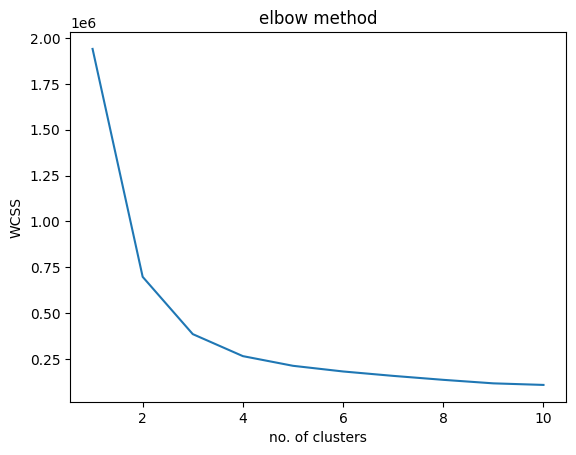

In [266]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,11):
  kmeans = KMeans(n_clusters = i,init="k-means++")
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title("elbow method")
plt.xlabel("no. of clusters")
plt.ylabel("WCSS")


#### Training the K-Means model on dataset

In [269]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters = 4,init="k-means++")
y_kmeans = kmeans.fit_predict(X)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [270]:
X["cluster"] = y_kmeans

In [271]:
X

,Gender,Ever_Married,Age,Graduated,Work_Experience,Spending_Score,Family_Size,Var_1,Artist,Doctor,Engineer,Entertainment,Executive,Healthcare,Homemaker,Lawyer,Marketing,cluster
0,1,0,22,0,1.0,2,4.0,3,0,0,0,0,0,1,0,0,0,1
2,0,1,67,1,1.0,2,1.0,5,0,0,1,0,0,0,0,0,0,2
3,1,1,67,1,0.0,1,2.0,5,0,0,0,0,0,0,0,1,0,2
5,1,1,56,0,0.0,0,2.0,5,1,0,0,0,0,0,0,0,0,0
6,1,0,32,1,1.0,2,3.0,5,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8062,1,1,41,1,0.0,1,5.0,5,1,0,0,0,0,0,0,0,0,3
8064,1,0,35,0,3.0,2,4.0,3,0,0,0,0,1,0,0,0,0,3
8065,0,0,33,1,1.0,2,1.0,5,0,0,0,0,0,1,0,0,0,1
8066,0,0,27,1,1.0,2,4.0,5,0,0,0,0,0,1,0,0,0,1


In [272]:
X["cluster"].value_counts()

1    2142
3    2027
0    1613
2     883
Name: cluster, dtype: int64